In [19]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd
np.random.seed(903378735)
plt.style.use('seaborn-dark-palette')

In [20]:
from gen_training_data import describe_data , hr
data =  pd.read_csv('BH_NS_compiled.csv')
#print(data)
describe_data(data)
# selecting only non-transient sources
#selected_class = [1400 , 1500 , 1410 , 1530 , 1430 , 1440 ,1600 , 1610 ,1640, 1650, 1690 ]
#data = data[data['A_CLASS'].isin(selected_class)]
hr()
describe_data(data)
x = data.drop(['index_compiled' , 'class' ] , axis=1)
#print(np.unique(x['A_CLASS']))
#print(np.unique(x['A_CLASS']))
y = data['class']

top_feat = np.loadtxt('rows/top_100_features.csv' ,dtype='str')[:]
x = x[top_feat]
display(x)
display(y)

Total Number of Sources :  108
Number of Features :  144
Class 0 sources : 31
Class 1 sources : 77
_____________________________________________________________
Total Number of Sources :  108
Number of Features :  144
Class 0 sources : 31
Class 1 sources : 77


,B_M_PHOTFLUX_AP,B_U_PHOTFLUX_AP90_AVG,B_M_FLUX_AP_AVG,B_H_FLUX_AP90_AVG,B_M_FLUX_AP,B_M_PHOTFLUX_AP_AVG,B_B_PHOTFLUX_AP_AVG,B_U_PHOTFLUX_AP_AVG,B_H_PHOTFLUX_AP90_AVG,B_H_FLUX_AP_AVG,...,B_POWLAW_AMPL_RHAT,B_M_POSITION_ANGLE,B_H_POSITION_ANGLE,B_B_FLUX_AP,B_BREMS_NORM_RHAT,B_BREMS_NH_RHAT,B_BREMS_KT_RHAT,B_BB_NH_RHAT,B_BB_KT_RHAT,B_BB_AMPL_RHAT
0,0.000928,0.000000,0.000654,0.003509,0.001064,0.000540,0.000000,0.000000,0.003050,0.001074,...,0.0,0.0,0.0,1.230000e-14,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.031795,0.000000,0.000000,0.028927,0.031643,0.218932,0.000000,0.012623,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.022716,0.000000,0.000000,0.000000,0.000096,0.000117,0.025777,0.000033,0.000000,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.031795,0.000000,0.000000,0.028927,0.031643,0.218932,0.000000,0.012623,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
4,0.002146,0.253879,0.002699,0.000698,0.002699,0.002146,0.001634,0.240777,0.000839,0.000207,...,0.0,0.0,0.0,6.390000e-15,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.007963,0.000000,0.008590,0.004982,0.007821,0.008818,0.000000,0.000000,0.005252,0.001943,...,0.0,0.0,0.0,3.240000e-14,0.0,0.0,0.0,0.0,0.0,0.0
104,0.001547,0.008793,0.004083,0.012291,0.001590,0.003919,0.004977,0.006117,0.012018,0.003666,...,0.0,0.0,0.0,1.570000e-14,0.0,0.0,0.0,0.0,0.0,0.0
105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
106,0.000838,0.000000,0.000801,0.001080,0.000808,0.000830,0.000826,0.000000,0.001133,0.000342,...,0.0,0.0,0.0,1.870000e-15,0.0,0.0,0.0,0.0,0.0,0.0


0      0.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
103    0.0
104    1.0
105    0.0
106    0.0
107    0.0
Name: class, Length: 108, dtype: float64

## Selecting only top 20 features

In [21]:
def split_data(x,y,s):   
    x =  x.to_numpy()
    y =  y.to_numpy()
    split = s
    split_no = int(split*len(y))
    x_train = x[:split_no, :]
    y_train = y[:split_no]
    x_test = x[split_no:, :]
    y_test = y[split_no:]
    return ((x_train,y_train) , (x_test ,y_test))

(x_train,y_train),(x_test,y_test) = split_data(x, y, 0.9)
_ , (x_test_copy , y_test_copy) = split_data(x, y, 0.7)
print(x_train.shape ,y_train.shape)
print(x_test.shape ,y_test.shape)

(x_test_copy , y_test_copy) , (a,b) = split_data(x, y, 0.7)
np.shape(x_test_copy)

(97, 142) (97,)
(11, 142) (11,)


(75, 142)

# Neural Netork starts here

In [22]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [23]:
one_hot_y_train =  to_categorical(y_train)
one_hot_y_test =  to_categorical(y_test)

In [24]:
print(len(one_hot_y_train[1]))

2


In [29]:
np.random.seed(903378735)
def model_gen(shape , input_len):

    inputs =  keras.Input(shape=(input_len,))
    dense =  layers.Dense(64, activation='relu')
    x = dense(inputs)
    x =  layers.BatchNormalization(axis=-1)(x)
    #x = layers.Dropout(0.3)(x)
    for s in shape:
        x = layers.Dense(s, activation='relu')(x)
    x =  layers.BatchNormalization(axis=-1)(x)
    outputs = layers.Dense(2 , activation='softmax')(x)
    model = keras.Model(inputs=inputs , outputs=outputs , name='trial_model')
    np.random.seed(903378735)
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.SGD(learning_rate=0.00005),
        metrics = ["accuracy"],
    )
    return model



In [30]:
model = model_gen([64,8,8,4] , x_train.shape[1])
history = model.fit(x_train, one_hot_y_train, batch_size=64, epochs=20, validation_split=0.3 , verbose=1)
#pd.DataFrame(history.history).plot(figsize=(8,5))


Epoch 1/20
2/2 [==============================] - 1s 227ms/step - loss: 0.7925 - accuracy: 0.6567 - val_loss: 0.6945 - val_accuracy: 0.3333
Epoch 2/20
2/2 [==============================] - 0s 24ms/step - loss: 0.7622 - accuracy: 0.6716 - val_loss: 0.6943 - val_accuracy: 0.3667
Epoch 3/20
2/2 [==============================] - 0s 25ms/step - loss: 0.7813 - accuracy: 0.6567 - val_loss: 0.6941 - val_accuracy: 0.4333
Epoch 4/20
2/2 [==============================] - 0s 30ms/step - loss: 0.7889 - accuracy: 0.6418 - val_loss: 0.6939 - val_accuracy: 0.3667
Epoch 5/20
2/2 [==============================] - 0s 33ms/step - loss: 0.7780 - accuracy: 0.6866 - val_loss: 0.6937 - val_accuracy: 0.4667
Epoch 6/20
2/2 [==============================] - 0s 28ms/step - loss: 0.7505 - accuracy: 0.7015 - val_loss: 0.6931 - val_accuracy: 0.6333
Epoch 7/20
2/2 [==============================] - 0s 27ms/step - loss: 0.7937 - accuracy: 0.6567 - val_loss: 0.6927 - val_accuracy: 0.6667
Epoch 8/20
2/2 [==========

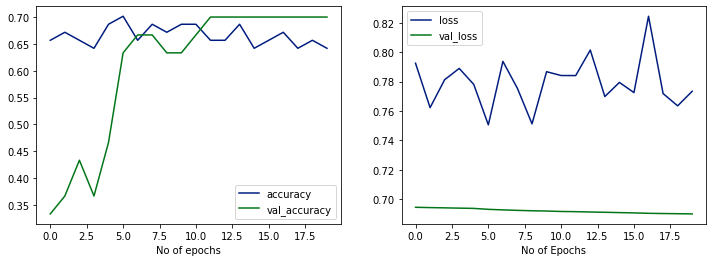

In [31]:
hist = history.history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist['accuracy'] , label = 'accuracy')
plt.plot(hist['val_accuracy'] , label = 'val_accuracy')
plt.xlabel('No of epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist['loss'] , label = 'loss')
plt.plot(hist['val_loss'] , label='val_loss')
plt.xlabel("No of Epochs")
plt.legend()
plt.savefig('plots/bn_model_level_0_rows.png')
plt.show()

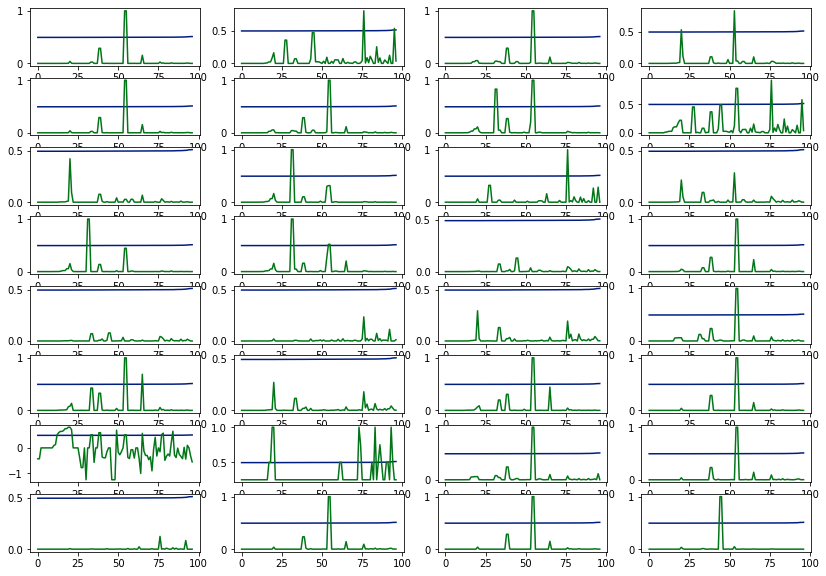

[-0.03508890123503088, 0.1781167067048036, -0.04806008079407408, -0.07343577378338445, -0.03532042601237084, -0.04821224455016331, -0.09717109678202808, 0.07155619495252134, -0.10356712800607244, -0.11024878642372715, 0.15285489698519897, -0.060048573160331145, -0.10678229976883816, -0.10855695396790559, 0.00031738646809939037, -0.03939776981619737, 0.010383867421779684, 0.16994720571632238, 0.013420146078314436, -0.05269531975447135, -0.06954893210570391, 0.018341945291986586, -0.05558226298982756, -0.03293038793071554, -0.19405749920562698, 0.22698356131651684, -0.01576074031332273, -0.022608500440361105, 0.15424030285710622, -0.022263100957549138, -0.032930642656659695, -0.04453936492966638]


In [32]:
cv_prob = [n[0] for n in model.predict(x_train)]
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(14,10))
#for i in range(4):
corr = []
for j in range(32):
    index = j
    list1 = x_train[:,index]
    list2 = cv_prob

    zipped_lists = zip(list2, list1)


    sorted_zipped_lists = sorted(zipped_lists)

    sorted_list1 = [element for _, element in sorted_zipped_lists]
    

    cv_prob_sort = sorted(cv_prob)
    plt.subplot(8,4,index+1)
    plt.plot(cv_prob_sort)
    plt.plot(sorted_list1)
    #plt.show()
    corr.append(np.corrcoef(x=cv_prob , y=list1)[1,0])
plt.show()
print(corr)

# Hidde Layers analysis

In [13]:
extractor = keras.Model(
    inputs=model.inputs,
    outputs=[layer.output for layer in model.layers])


In [14]:
extractor.predict(x_test)[-1]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [15]:
y_pred = extractor.predict(x_test)[-1]
p = [np.argmax(pi) for pi in extractor.predict(x_test)[-1]]
z = y_test
for p , z in zip(p,z):
    print(p,z)

0 0.0
0 1.0
0 1.0
0 1.0
0 0.0
0 1.0
0 0.0
0 1.0
0 0.0
0 0.0
0 0.0


In [16]:
from utilities import conf_mat
cf = conf_mat(model , x_test , y_test)
print(cf)

[[6.]
 [5.]]
